In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

def parse_file(file):
    df = pd.read_pickle(file)
    df_param = pd.read_csv("parameters.txt", delim_whitespace=True, dtype='str')
    df_param.rename(columns = {'ID':'id'}, inplace=True)
    df_param = df_param.astype({'N': float, 'rho':float, 'id':str,'kb': float, 'plink':float, 'epsilon':float})
    Nmax=51000

    df_param['Nparticles'] = (Nmax*df_param.rho)/df_param.N
    
    df = pd.merge(df,df_param, on='id')
    df = df.astype({'id':str, 'time': int, 'N': float, 'kb': float, 
                'plink':float, 
                'rho':float, 'epsilon':float, 
                'largest_domain':float, 'node_connectivity':int, 'pstart':str })
    
    return df,df_param


def get_percolation(df,df_param, x, name, label):
    
    std_cond = {'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    df['percentage_largest'] = df.largest_domain/df.Nparticles
    df = pd.DataFrame({'mean_percentage_largest' : df.groupby('id').percentage_largest.mean(),
                  'std_percentage_largest' : df.groupby('id').percentage_largest.std()}).reset_index()
    df = pd.merge(df,df_param, on='id')
    
    
    fig, ax = plt.subplots(figsize=(10,7))
    
    print(name,len(df[x].unique()))
    sns.set_palette(sns.color_palette("viridis"))
    ax.tick_params(axis='both', which='major', labelsize=20)
     
    plt.xlabel("$\epsilon$", size=25)
    plt.ylabel("$R/N$", size=20)

    
    for x_i in np.sort((df[x].unique())):
        print(x_i)
        ds = df[df[x] == x_i]
        for key, val in std_cond.items():
            if key!=x:
                ds = ds[ds[key] == val]
        
        arr= ds[['mean_percentage_largest','std_percentage_largest','epsilon']].values
        arr = arr[arr[:, 2].argsort()]
    
        plt.errorbar(arr[:,2],arr[:,0],arr[:,1], lw=2, label=r'{} = {}'.format(label, x_i))

    plt.legend(loc='lower right', fontsize=16)
    plt.savefig("{}.pdf".format(name))
    plt.show()
    
def get_degree_histogram(df,df_param,x,name,label):
    
    df = pd.DataFrame({"degree_sequence": df.groupby('id').degree_sequence.apply(list)}).reset_index()
    df.degree_sequence = df.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df = pd.merge(df,df_param, on='id')
    
    fig, ax = plt.subplots(len(df.epsilon.unique()), len(df[x].unique()), figsize=(20,20))
    std_cond = {'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    ds = df
    for key, val in std_cond.items():
         if key!=x:
                ds = ds[ds[key] == val]
    
    print(ds.dtypes)
    
    color_list = sns.color_palette("magma_r", len(ds.epsilon.unique()))
    color_dict=dict(zip(sorted(ds.epsilon.unique()), color_list))
    
    max_total=20
    
    for lx, eps_i in enumerate(sorted(ds.epsilon.unique())):
        print(ds.epsilon.unique())
        for ly, x_i in enumerate(sorted(ds[x].unique())):
            
            di = ds[(ds[x] == x_i) & (ds.epsilon == eps_i)]
           
            arr= di['degree_sequence'].values
            
            bins=np.max(arr[0])
            ax[lx,ly].hist(arr, bins=bins, facecolor=color_dict[eps_i],density=True, label="epsi = {}, {} = {}".format(eps_i,label,x_i))
            ax[lx,ly].legend(loc='upper right', fontsize=9)
            ax[lx,ly].set_xlabel("degree crosslinker", fontsize=10)
            ax[lx,ly].set_ylabel("P", fontsize=10)
            ax[lx,ly].set_xlim((0,max_total))
    
    plt.savefig("{}.pdf".format(name))
    plt.show()
    
    
def get_domain_histogram(df,df_param,x, name, label):
    df = pd.DataFrame({"domain_lengths": df.groupby('id').domain_lengths.apply(list)}).reset_index()
    df.domain_lengths = df.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
    df = pd.merge(df,df_param, on='id')
    
    fig, ax = plt.subplots(len(df.epsilon.unique()), len(df[x].unique()), figsize=(20,20))
    std_cond = {'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    ds = df
    for key, val in std_cond.items():
         if key!=x:
                ds = ds[ds[key] == val]
    
    
    color_list = sns.color_palette("viridis_r", len(ds.epsilon.unique()))
    color_dict=dict(zip(sorted(ds.epsilon.unique()), color_list))
    
    max_total=340 
   
    for lx, eps_i in enumerate(sorted(ds.epsilon.unique())):
        print(ds.epsilon.unique())
        for ly, x_i in enumerate(sorted(ds[x].unique())):
            
            di = ds[(ds[x] == x_i) & (ds.epsilon == eps_i)]
           
            arr= di['domain_lengths'].values
            
            bins=np.max(arr[0])
            ax[lx,ly].hist(arr, bins=bins, density=True, facecolor=color_dict[eps_i], label="epsi = {}, {} = {}".format(eps_i,label,x_i))
            ax[lx,ly].legend(loc='upper right', fontsize=9)
            ax[lx,ly].set_xlabel("crosslinker domain size", fontsize=10)
            ax[lx,ly].set_ylabel("P", fontsize=10)
            #ax[lx,ly].set_xlim((0,max_total))
    
   
    plt.savefig("{}.pdf".format(name))
    plt.show()

    

## 2.1 Polymer data 

### 2.1.1 Percolation 

percolation_rho 4
0.05
0.1
0.15
0.2


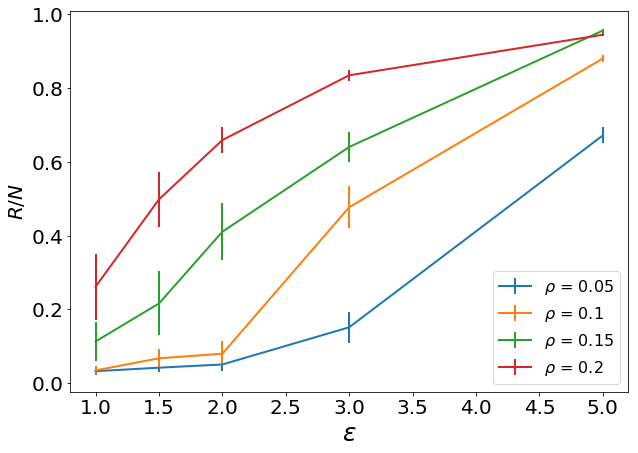

percolation_plink 4
0.05
0.1
0.15
0.2


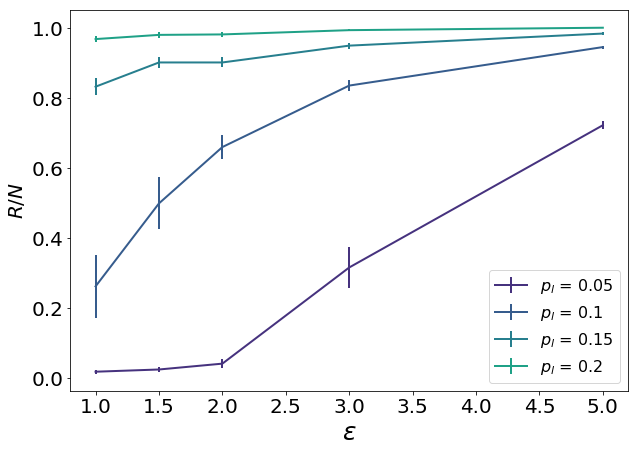

percolation_kb 5
0.0
10.0
30.0
300.0
3000.0


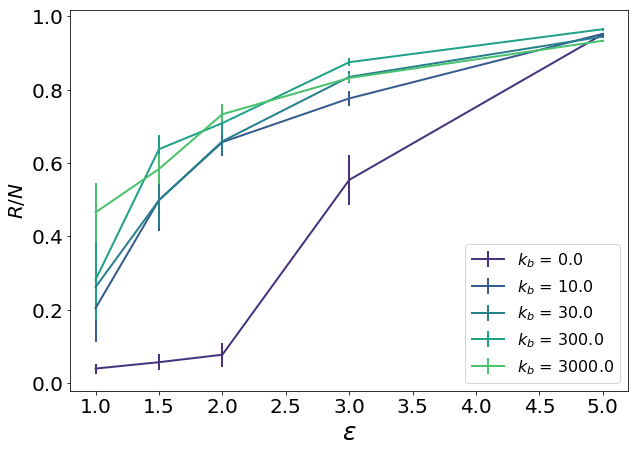

percolation_N 2
10.0
30.0


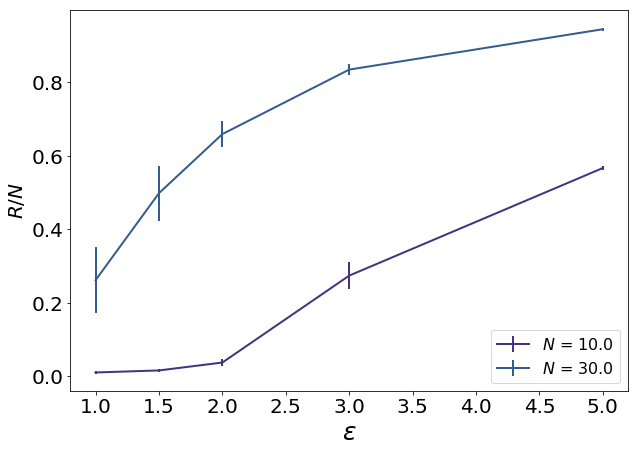

In [2]:
df,df_param = parse_file('network_data_polymer.pickle')

get_percolation(df,df_param,'rho',"percolation_rho", "$\\rho$")
get_percolation(df,df_param,'plink',"percolation_plink", "$p_{l}$")
get_percolation(df,df_param, 'kb', "percolation_kb", "$k_{b}$")
get_percolation(df,df_param, 'N',"percolation_N", "$N$")



**Decision**: exclude short chains **!!!!** 

### 2.1.2 Degree Histograms 

id                  object
degree_sequence     object
N                  float64
kb                 float64
rho                float64
plink              float64
epsilon            float64
pstart              object
Nparticles         float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


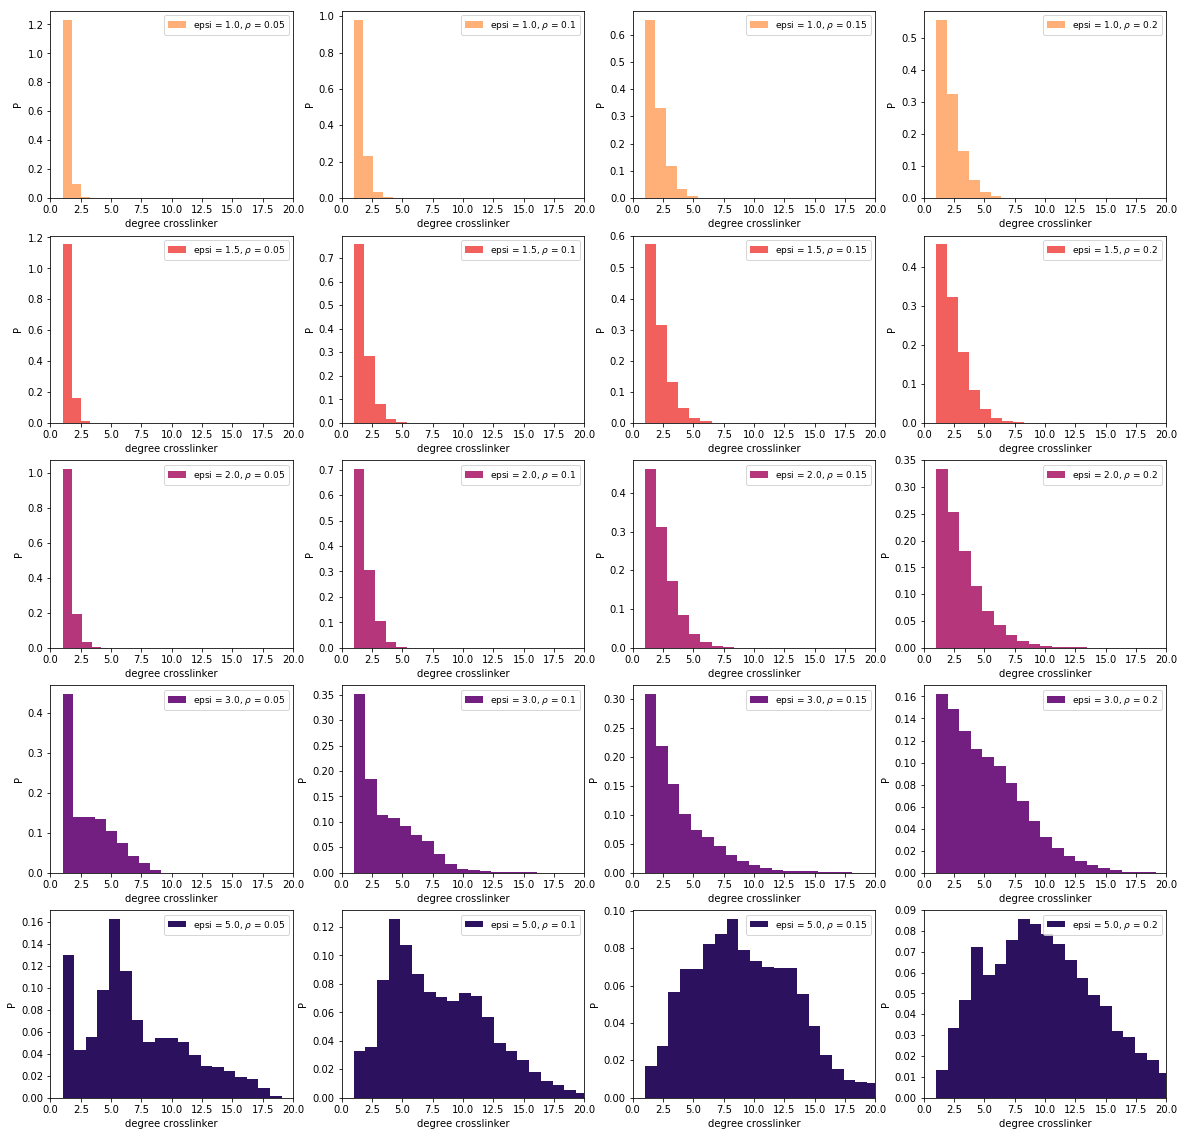

id                  object
degree_sequence     object
N                  float64
kb                 float64
rho                float64
plink              float64
epsilon            float64
pstart              object
Nparticles         float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


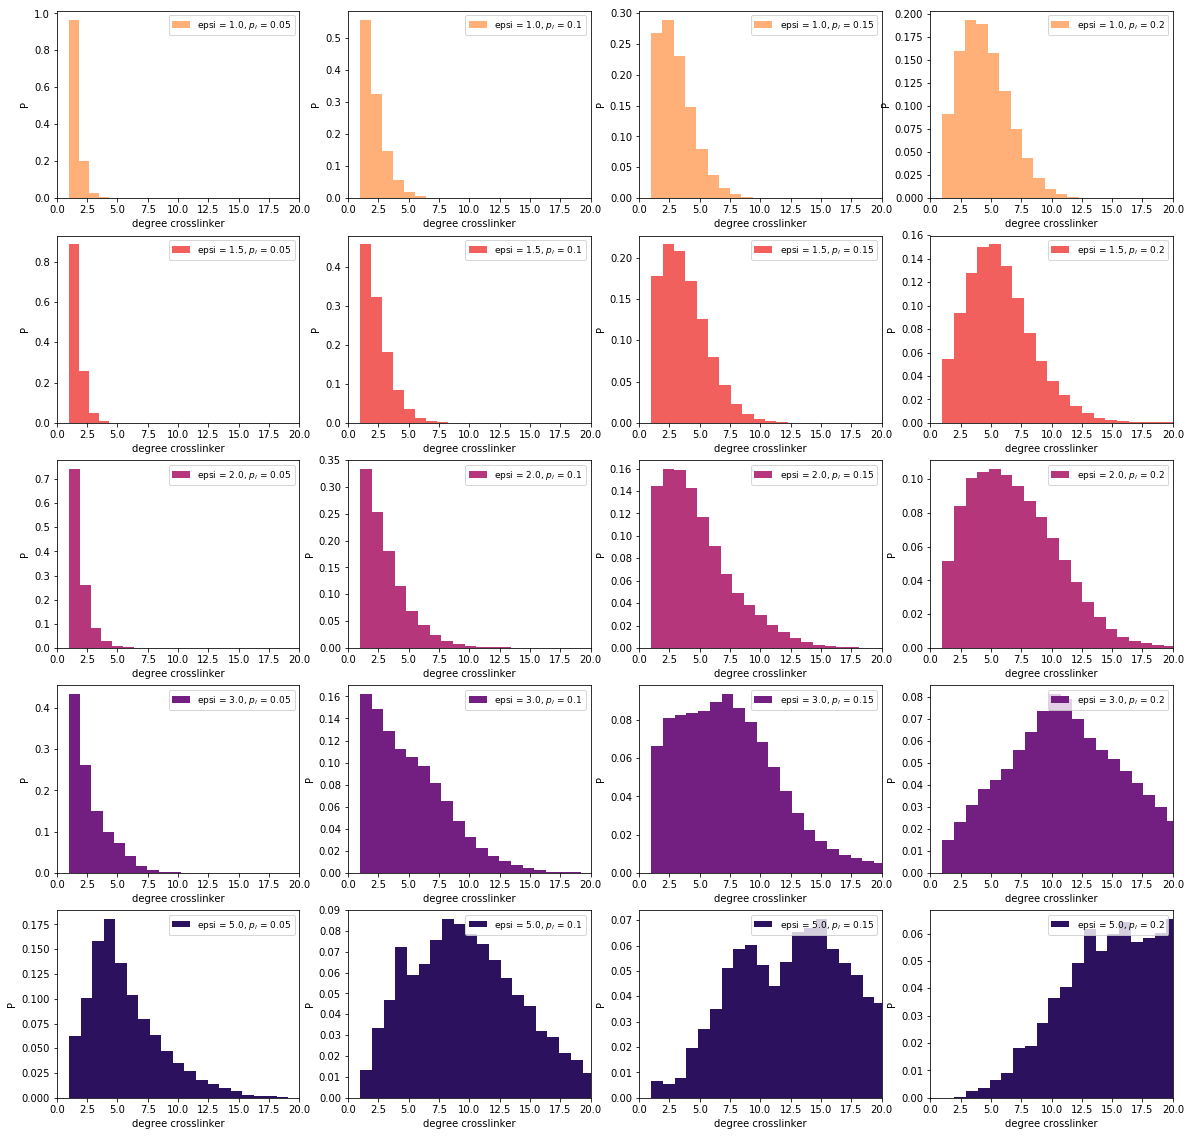

id                  object
degree_sequence     object
N                  float64
kb                 float64
rho                float64
plink              float64
epsilon            float64
pstart              object
Nparticles         float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


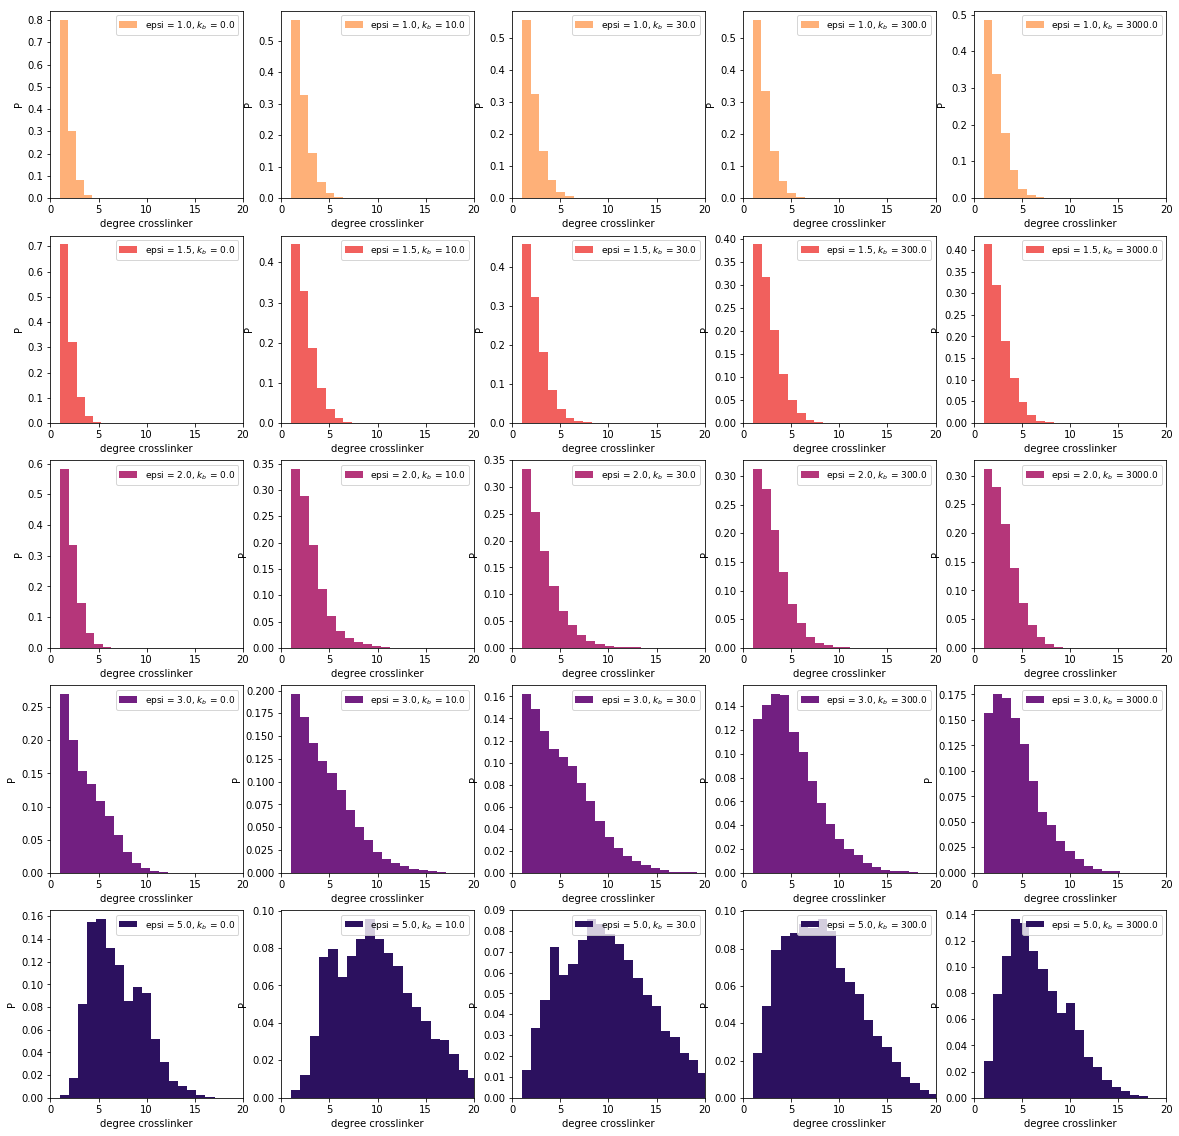

In [3]:
get_degree_histogram(df,df_param,"rho","degree_rho","$\\rho$")
get_degree_histogram(df,df_param,"plink","degree_plink","$p_{l}$")
get_degree_histogram(df,df_param,"kb","degree_kb","$k_{b}$")

### 2.1.3 Domain length Histograms 

[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


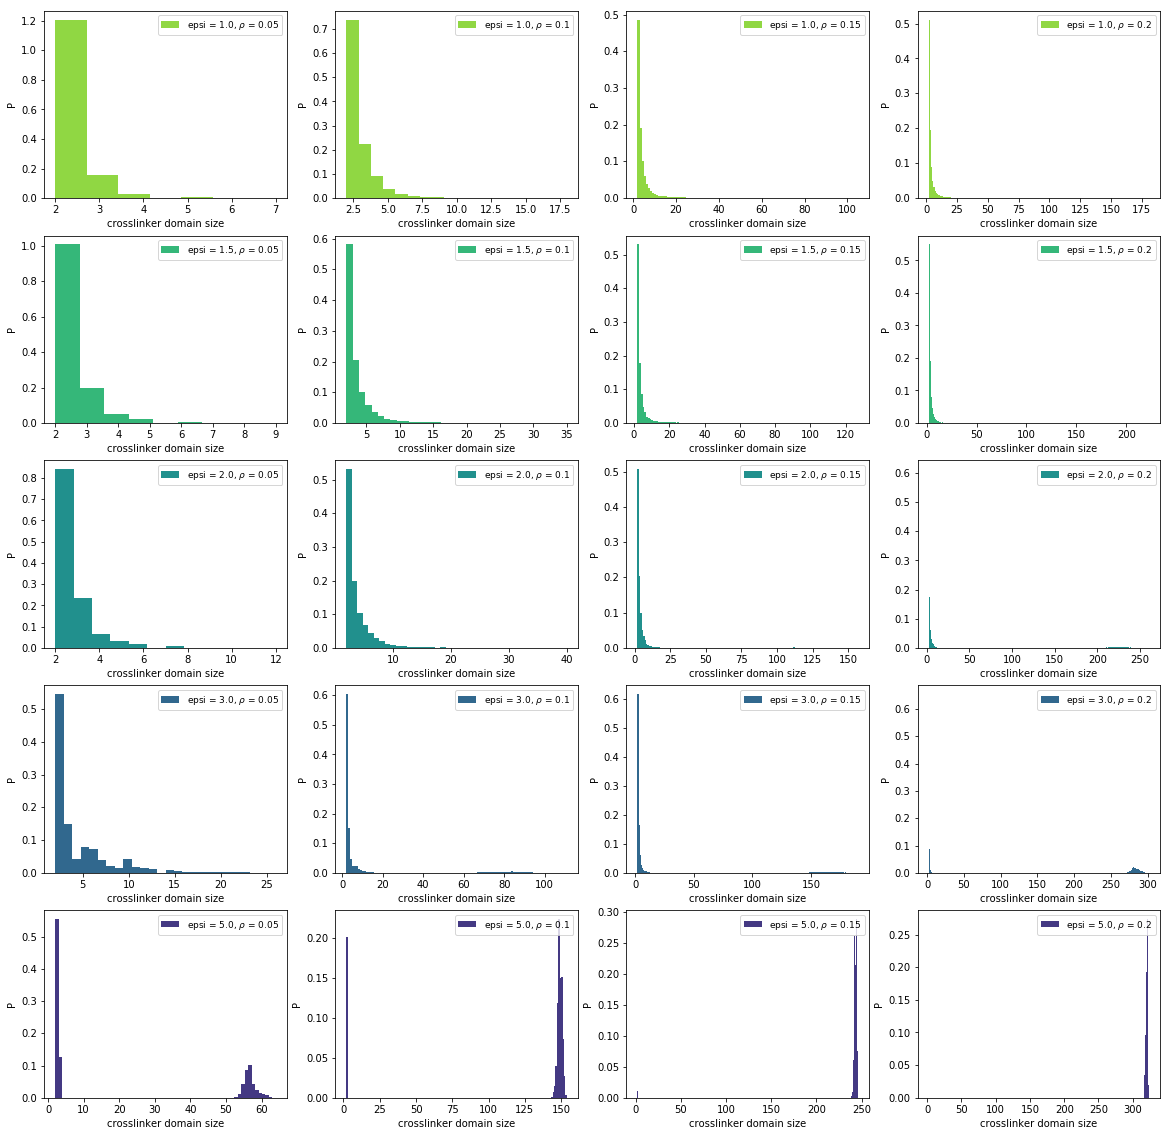

[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


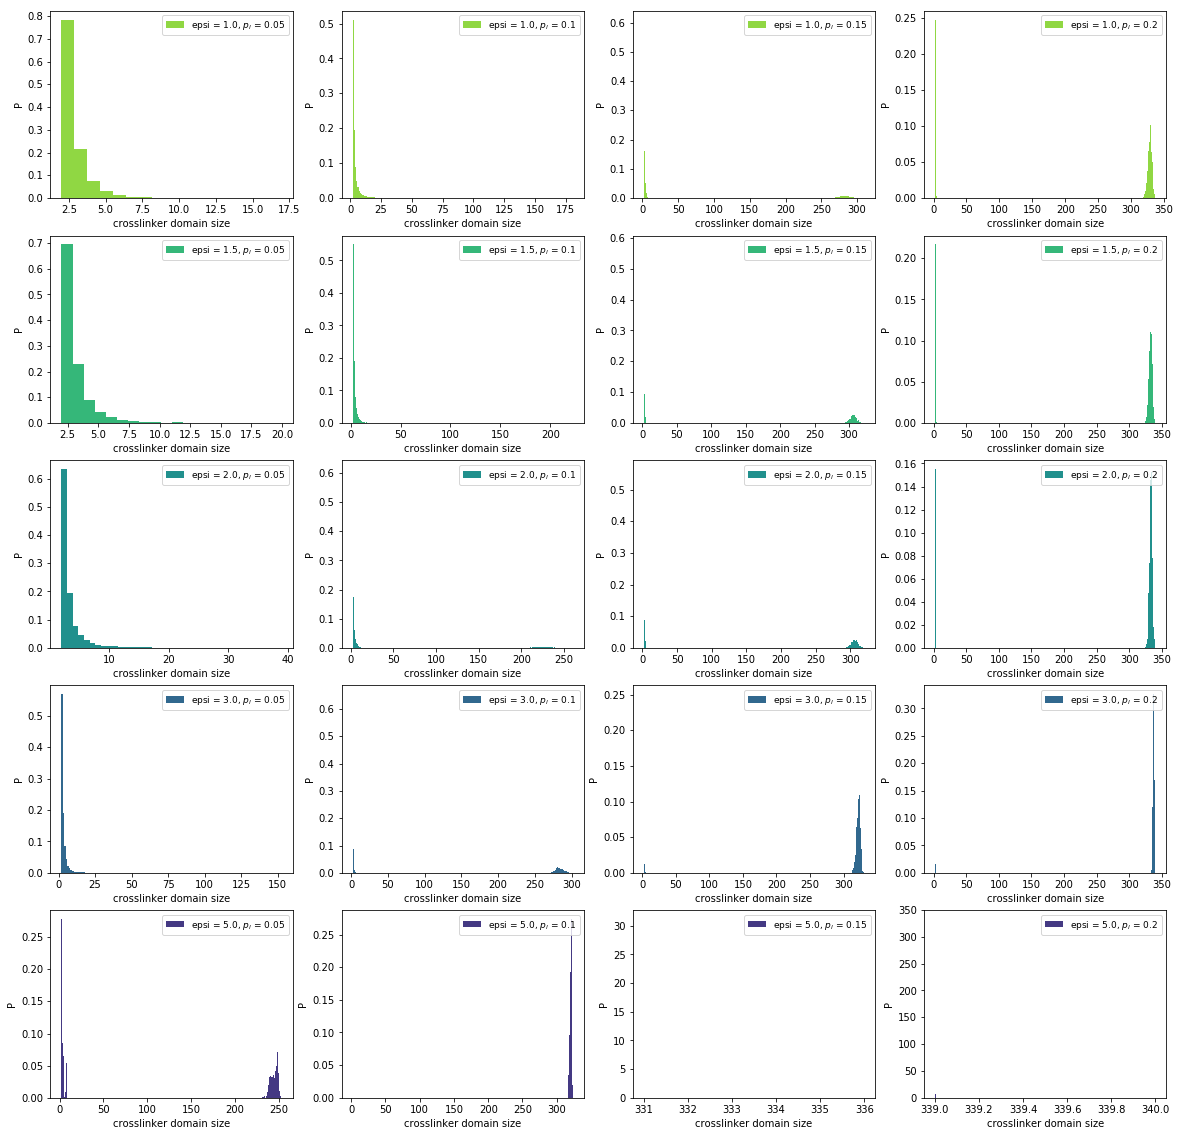

[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


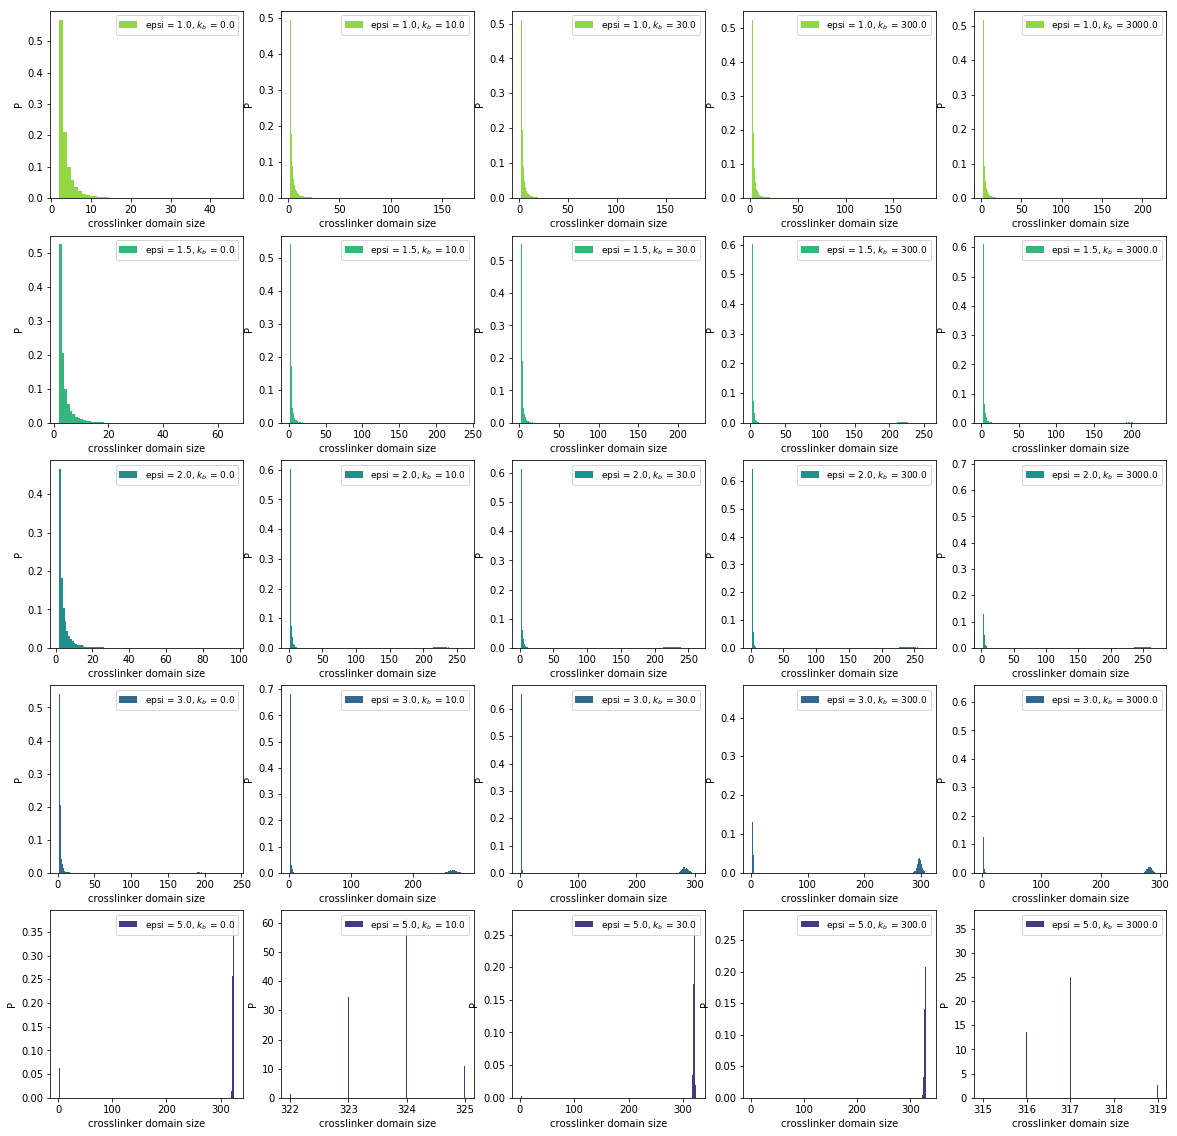

In [4]:
get_domain_histogram(df,df_param,"rho","domain_rho","$\\rho$")
get_domain_histogram(df,df_param,"plink","domain_plink","$p_{l}$")
get_domain_histogram(df,df_param,"kb","domain_kb","$k_{b}$")

## 2.2  Crosslinker Data 

### 2.2.1 Degree Histograms  

id                  object
degree_sequence     object
N                  float64
kb                 float64
rho                float64
plink              float64
epsilon            float64
pstart              object
Nparticles         float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


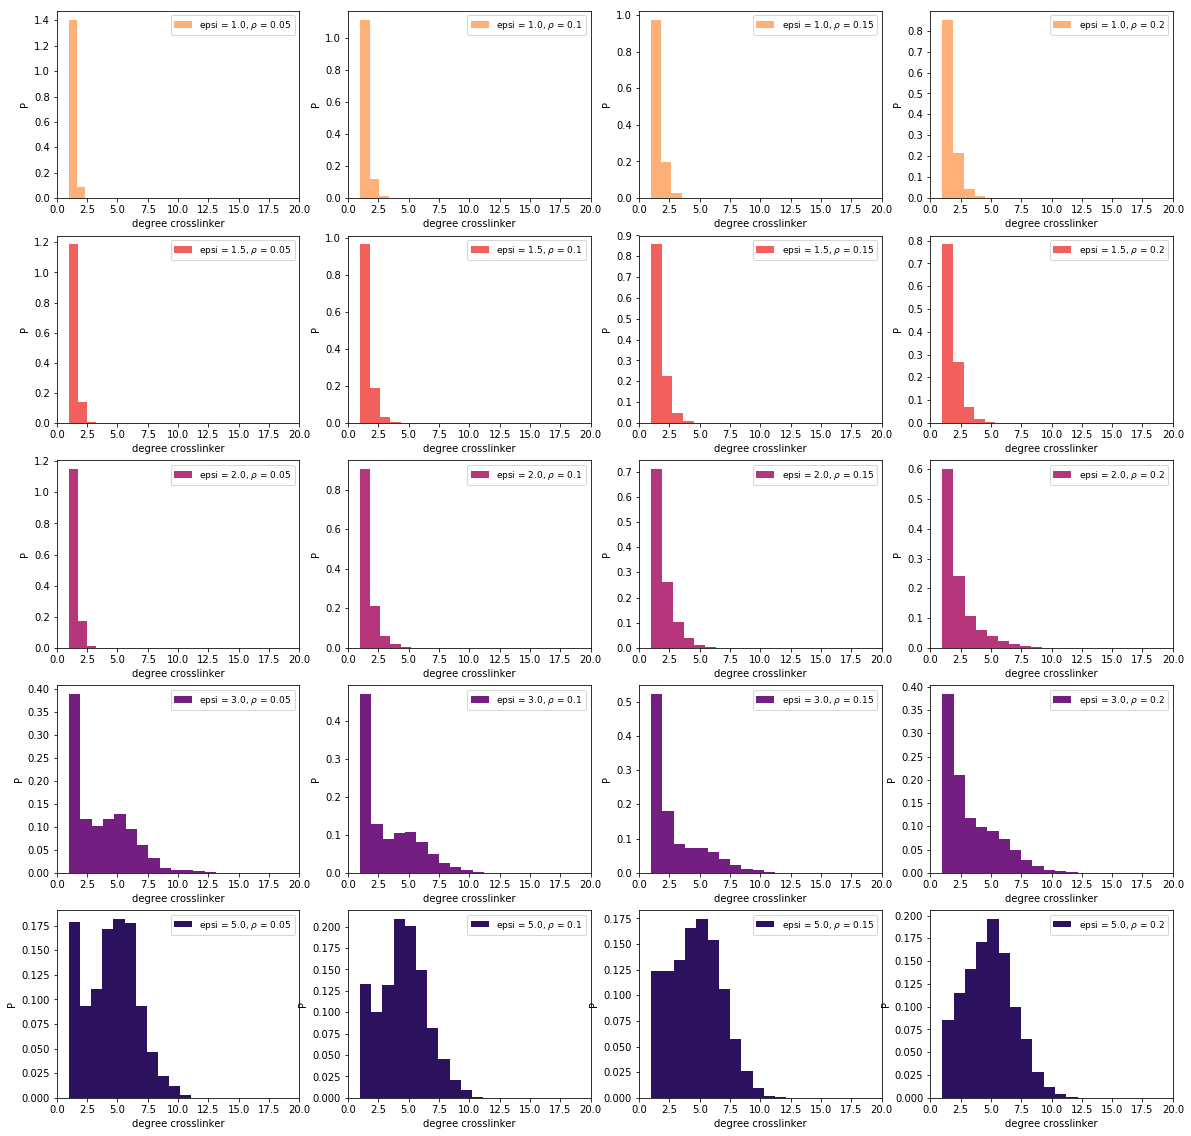

id                  object
degree_sequence     object
N                  float64
kb                 float64
rho                float64
plink              float64
epsilon            float64
pstart              object
Nparticles         float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


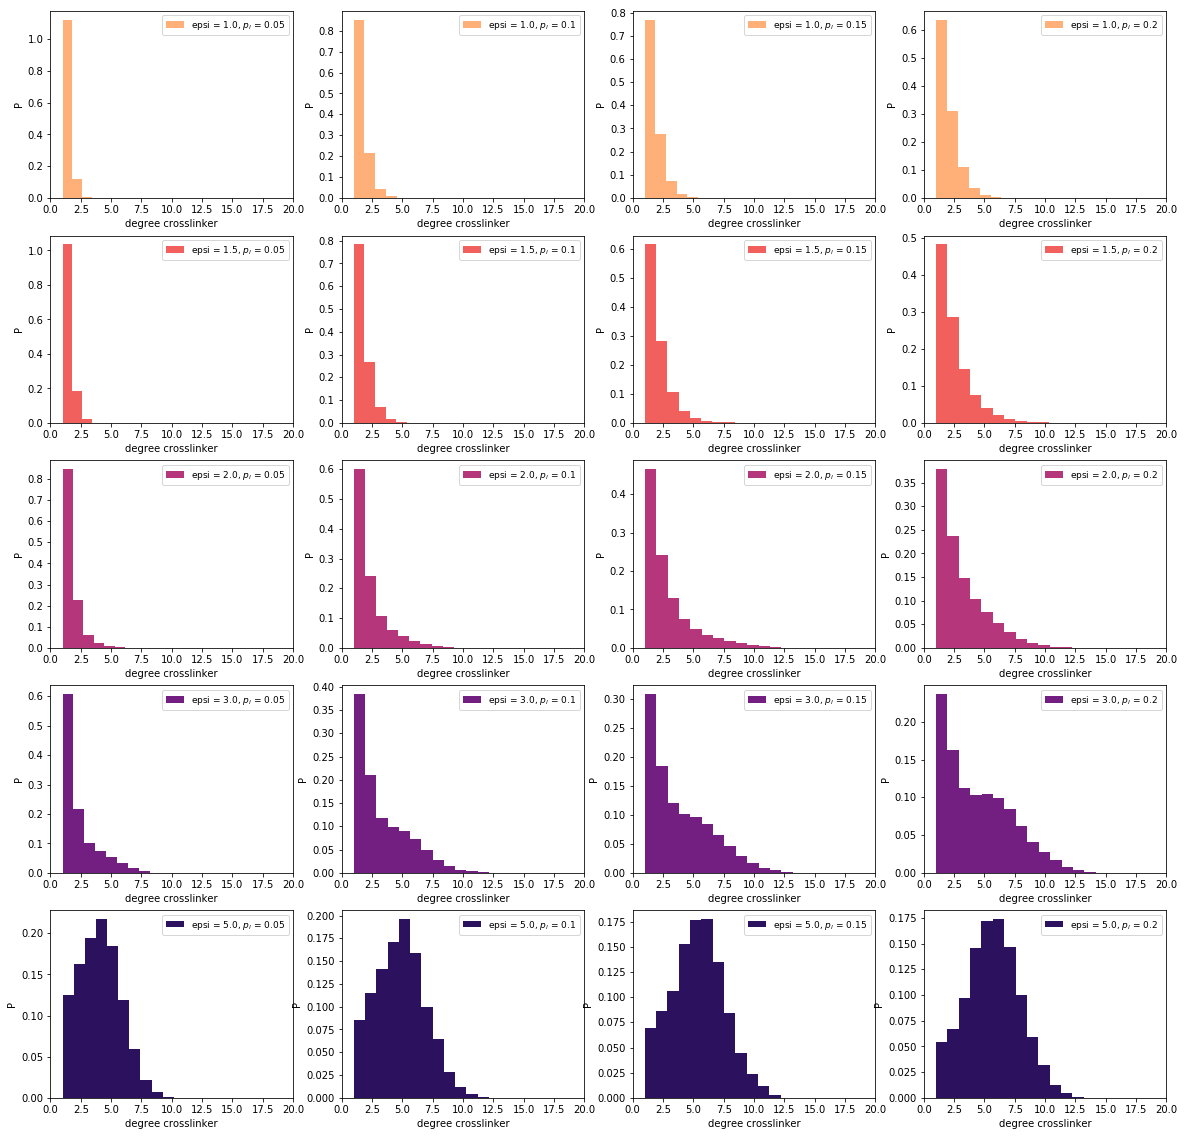

id                  object
degree_sequence     object
N                  float64
kb                 float64
rho                float64
plink              float64
epsilon            float64
pstart              object
Nparticles         float64
dtype: object
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


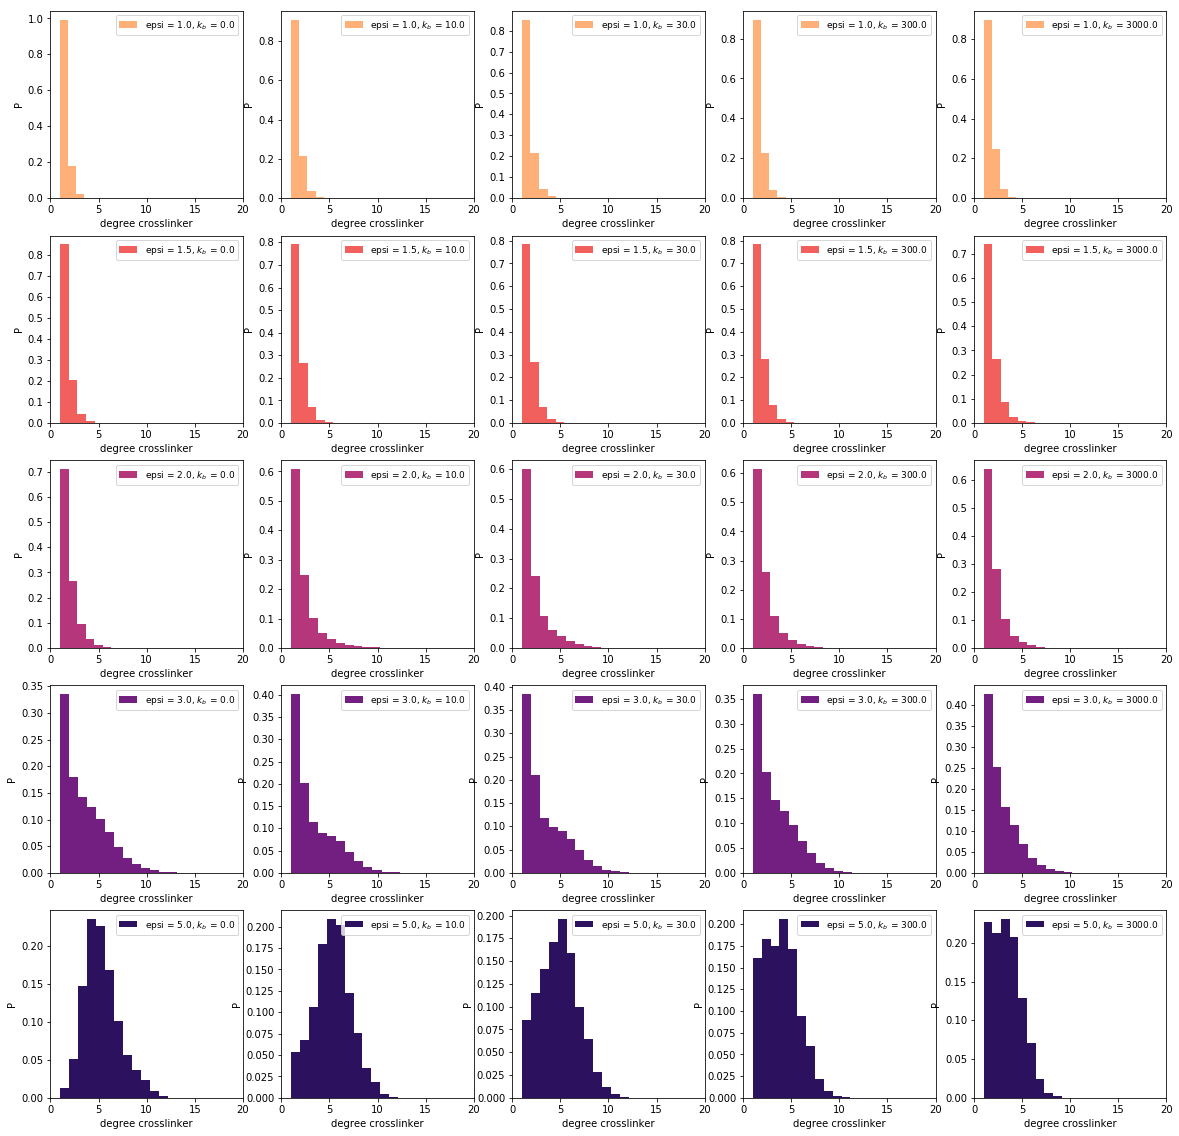

In [5]:
dc,dc_param = parse_file('network_data_crosslinker.pickle')
get_degree_histogram(dc,dc_param,"rho","crosslinker_degree_rho","$\\rho$")
get_degree_histogram(dc,dc_param,"plink","cross_linker_degree_plink","$p_{l}$")
get_degree_histogram(dc,dc_param,"kb","cross_linker_degree_kb","$k_{b}$")

### 2.2.2 Domain Histograms  

[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


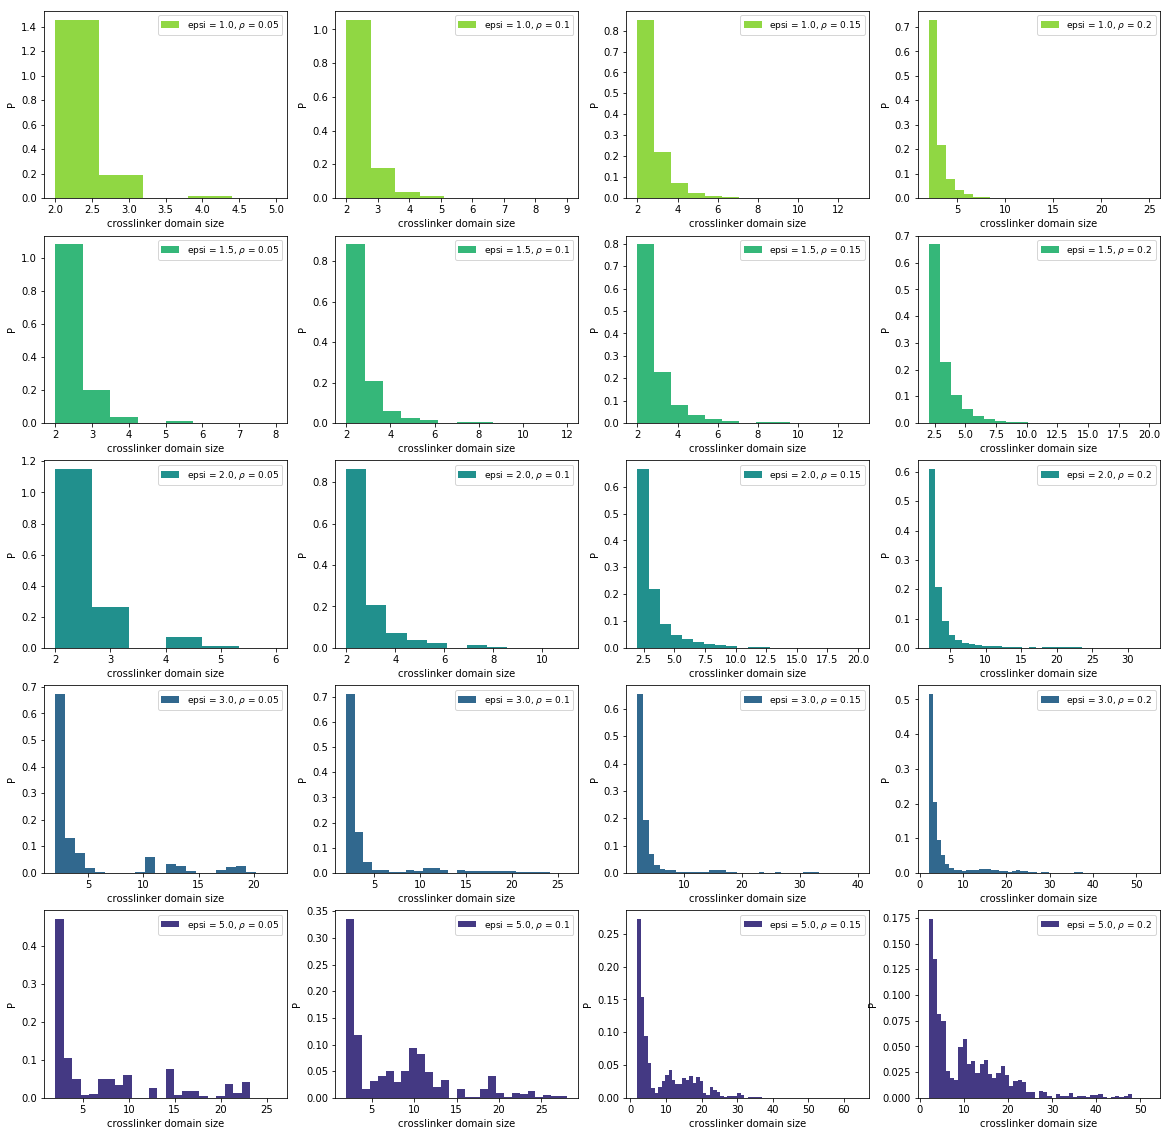

[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


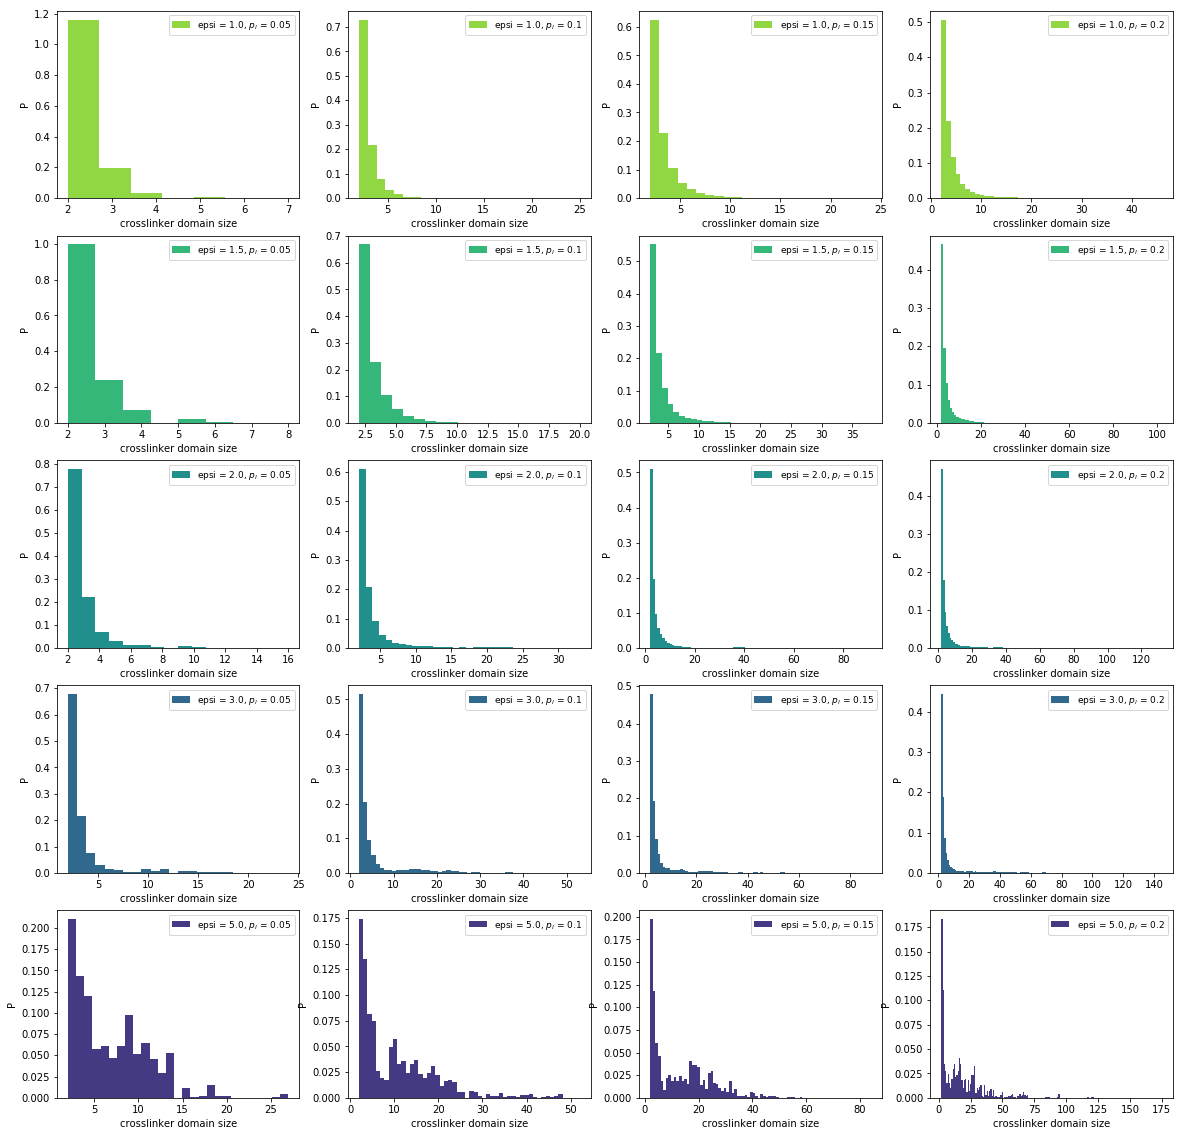

[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]
[1.  1.5 2.  3.  5. ]


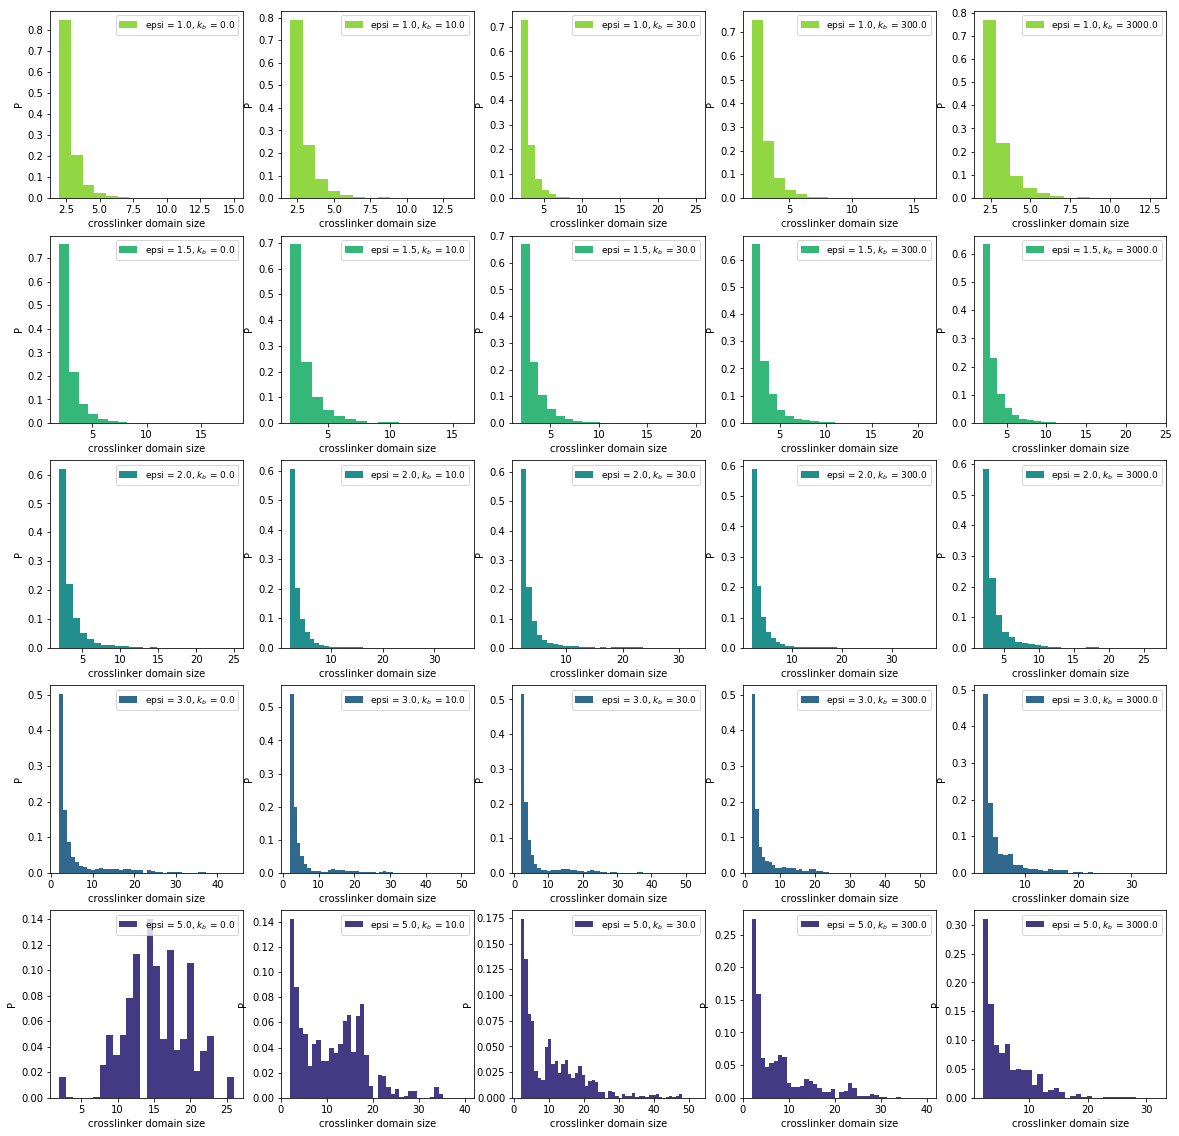

In [6]:
get_domain_histogram(dc,dc_param,"rho","crosslinker_domain_rho","$\\rho$")
get_domain_histogram(dc,dc_param,"plink","crosslinker_domain_plink","$p_{l}$")
get_domain_histogram(dc,dc_param,"kb","crosslinker_domain_kb","$k_{b}$")

In [20]:
def get_degree_plot(df,df_param,x,name,label, level):
    
    df = pd.DataFrame({"degree_sequence": df.groupby('id').degree_sequence.apply(list)}).reset_index()
    df.degree_sequence = df.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df = pd.merge(df,df_param, on='id')
    
    fig, ax = plt.subplots(figsize=(5,5))
    std_cond = {'epsilon': 5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    ds = df
    for key, val in std_cond.items():
         if key!=x:
                ds = ds[ds[key] == val]
    
    
    color_list = sns.color_palette("magma_r", len(ds[x].unique()))
    color_dict=dict(zip(sorted(ds[x].unique()), color_list))
    
    max_total=35
    
    for lx, x_i in enumerate(sorted(ds[x].unique())):
        di = ds[(ds[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
                                      
                                      
        plt.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        plt.legend(loc='upper right', fontsize=16)
        plt.xlabel("{} degree".format(level), fontsize=16)
        plt.ylabel("P", fontsize=16)
        plt.xlim((0,max_total))
        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.tight_layout()
    
    plt.savefig("{}_{}_plot.pdf".format(name,level))
    plt.show()
    
    
def get_domain_plot(df,df_param,x,name,label, level):
        
    df = pd.DataFrame({"domain_lengths": df.groupby('id').domain_lengths.apply(list)}).reset_index()
    df.domain_lengths = df.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
    df = pd.merge(df,df_param, on='id')
    

    fig, ax = plt.subplots(figsize=(5,5))
    std_cond = {'epsilon': 5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    ds = df
    for key, val in std_cond.items():
         if key!=x:
                ds = ds[ds[key] == val]
    
    color_list = sns.color_palette("magma_r", len(ds[x].unique()))
    color_dict=dict(zip(sorted(ds[x].unique()), color_list))    
    
    ax.set_yscale('log')   
    for lx, x_i in enumerate(sorted(ds[x].unique())):
        di = ds[(ds[x] == x_i)]
        arr= di['domain_lengths'].values
        bins=int(np.floor(np.max(arr[0])/1.))
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
                                      
                                      
        plt.plot(xarr, hist, color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        plt.legend(loc='upper right', fontsize=16)
        plt.xlabel("domain size {}".format(level), fontsize=16)
        plt.ylabel("P", fontsize=16)
        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.ylim([0.000001,1])
        plt.tight_layout()
    
    
    plt.savefig("{}_{}_plot.pdf".format(name,level))
    plt.show()
    

def get_degree_and_domain_plot(df,df_param,x,name,label, level, colormap):
    
    std_cond = {'epsilon': 5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    
    for key, val in std_cond.items():
         if key!=x:
                df = df[df[key] == val]
    
    
    df_s = pd.DataFrame({"domain_lengths": df.groupby('id').domain_lengths.apply(list)}).reset_index()
    df_s.domain_lengths = df_s.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
    df_s = pd.merge(df_s,df_param, on='id')
    
    
    df_d = pd.DataFrame({"degree_sequence": df.groupby('id').degree_sequence.apply(list)}).reset_index()
    df_d.degree_sequence = df_d.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df_d = pd.merge(df_d,df_param, on='id')
    
    
    df['percentage_largest'] = df.largest_domain/df.Nparticles
    df_p = pd.DataFrame({'mean_percentage_largest' : df.groupby('id').percentage_largest.mean(),
                  'std_percentage_largest' : df.groupby('id').percentage_largest.std()}).reset_index()
    df_p = pd.merge(df_p,df_param, on='id')
    
    
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(17,5))
     
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))    
    

    # degree plot 
    max_total=30   
    for lx, x_i in enumerate(sorted(df_d[x].unique())):
        di = df_d[(df_d[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
                                      
                                      
        ax1.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax1.set_xlabel("{} degree".format(level), fontsize=16)
        ax1.set_ylabel("P", fontsize=16)
        ax1.set_xlim((0,max_total))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        plt.tight_layout()
    
    
    #domain size 
    ax2.set_yscale('log')
    for lx, x_i in enumerate(sorted(df_d[x].unique())):
        di = df_s[(df_s[x] == x_i)]
        arr= di['domain_lengths'].values
        bins=int(np.floor(np.max(arr[0])/1.))
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
                                      
                                      
        ax2.plot(xarr, hist, color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax2.set_xlabel("{} domain size".format(level), fontsize=16)
        ax2.set_ylabel("P", fontsize=16)
        ax2.tick_params(axis='both', which='major', labelsize=16)
        ax2.set_ylim([0.00005,1])
        plt.tight_layout()
    
    
    # percolation 
  
    arr= df_p[['mean_percentage_largest','std_percentage_largest','epsilon']].values
    arr = arr[arr[:, 2].argsort()]
    
    ax3.errorbar(arr[:,2],arr[:,0],arr[:,1], c='k', capsize=5,lw=2, alpha=0.5)
    
    for i,x_i in enumerate(sorted(df_p[x].unique())):
        ax3.plot(arr[i,2],arr[i,0], marker='o', ms=10, color=color_dict[x_i], label="{} = {}".format(label,x_i), zorder=20)
    
    ax3.set_xlabel("$\epsilon$", size=25)
    ax3.set_ylabel("$R/N$", size=20)
    ax3.tick_params(axis='both', which='major', labelsize=16)
    
    
    plt.legend(ncol=1, bbox_to_anchor=(0.95,0.5),loc='upper right', fontsize=16)
    plt.savefig("{}_{}_triple_plot.pdf".format(name,level))



    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ip

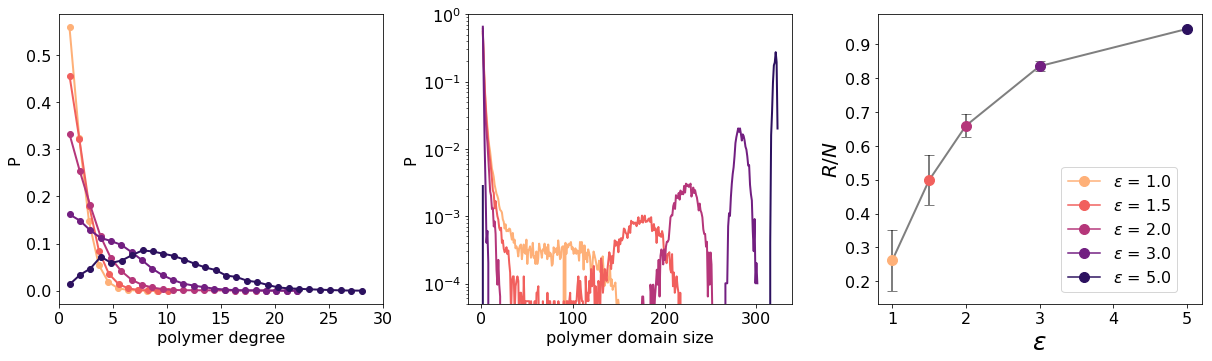

In [21]:
get_degree_and_domain_plot(df,df_param,"epsilon","degree_domain_epsilon","$\\epsilon$", "polymer", "magma_r")

In [9]:

def get_degree_and_domain_plot_flexibility(df,df_param,x,name,label, level, colormap):
    
    df['percentage_largest'] = df.largest_domain/df.Nparticles
    df_p = pd.DataFrame({'mean_percentage_largest' : df.groupby('id').percentage_largest.mean(),
                  'std_percentage_largest' : df.groupby('id').percentage_largest.std()}).reset_index()
    df_p = pd.merge(df_p,df_param, on='id')


    std_cond = {'epsilon': 5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    
    for key, val in std_cond.items():
         if key!=x:
                df = df[df[key] == val]
    
    
    df_s = pd.DataFrame({"domain_lengths": df.groupby('id').domain_lengths.apply(list)}).reset_index()
    df_s.domain_lengths = df_s.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
    df_s = pd.merge(df_s,df_param, on='id')
    
    
    df_d = pd.DataFrame({"degree_sequence": df.groupby('id').degree_sequence.apply(list)}).reset_index()
    df_d.degree_sequence = df_d.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df_d = pd.merge(df_d,df_param, on='id')
    
  
    
    fig, (ax1,ax3) = plt.subplots(1,2,figsize=(12,5))
     
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))    
    

    # degree plot 
    max_total=35  
    
    brr = np.empty(len(df_d[x].unique()))
    
    for lx, x_i in enumerate(sorted(df_d[x].unique())):
        di = df_d[(df_d[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
                   
        brr[lx] = xarr[np.argmax(hist)]      
                                      
        ax1.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax1.set_xlabel("{} degree".format(level), fontsize=16)
        ax1.set_ylabel("P", fontsize=16)
        ax1.set_xlim((0,max_total))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        
        plt.tight_layout()
        
    axins = fig.add_axes([0.3, 0.5, 0.15, 0.3])
    xl = np.array(sorted(df_d[x].unique()))
    axins.set_xscale('log')   
    axins.plot(xl+0.01, brr, color='k', lw=2)
    for i,x_i in enumerate(sorted(df_d[x].unique())):
        axins.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
    
                   
    axins.set_ylabel("max. degree".format(level), size=14)
    axins.set_xlabel(label, size=14)

 

    # percolation 
    std_cond = {'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    for i, x_i in enumerate(df_p[x].unique()): 
        
        ds = df_p[df_p[x] == x_i]
        for key, val in std_cond.items():
            if key!=x:
                ds = ds[ds[key] == val]
        
        arr= ds[['mean_percentage_largest','std_percentage_largest','epsilon']].values
        arr = arr[arr[:, 2].argsort()]
        ax3.errorbar(arr[:,2],arr[:,0],arr[:,1], c=color_dict[x_i], capsize=5,lw=2, label="{} = {}".format(label,x_i))
    
    
    ax3.set_xlabel("$\epsilon$", size=25)
    ax3.set_ylabel("$R/N$", size=20)
    ax3.tick_params(axis='both', which='major', labelsize=16)
     
    plt.tight_layout()
    
    
    ax3.legend(ncol=1, bbox_to_anchor=(1,0.55),loc='upper right', fontsize=16)
    plt.savefig("{}_{}_kb_triple_plot.pdf".format(name,level))





/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipyker

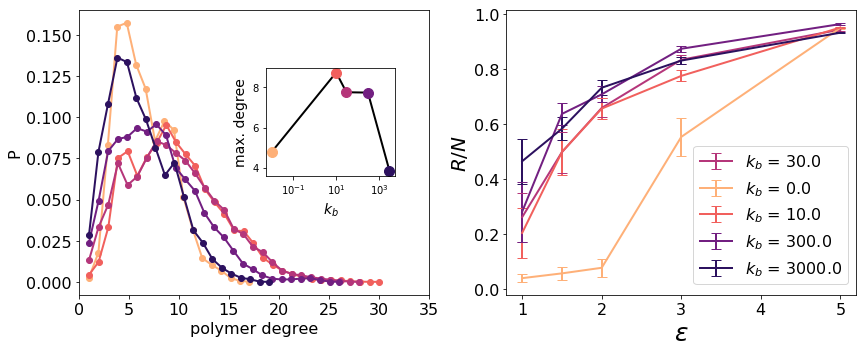

In [10]:
get_degree_and_domain_plot_flexibility(df,df_param,"kb","degree_domain_kb","$k_{b}$", "polymer", "magma_r")

In [11]:
def get_degree_and_domain_plot_pl(df,df_param,x,name,label, level, colormap):
    
    df['percentage_largest'] = df.largest_domain/df.Nparticles
    df_p = pd.DataFrame({'mean_percentage_largest' : df.groupby('id').percentage_largest.mean(),
                  'std_percentage_largest' : df.groupby('id').percentage_largest.std()}).reset_index()
    df_p = pd.merge(df_p,df_param, on='id')


    std_cond = {'epsilon': 5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    
    for key, val in std_cond.items():
         if key!=x:
                df = df[df[key] == val]
    
    
    df_s = pd.DataFrame({"domain_lengths": df.groupby('id').domain_lengths.apply(list)}).reset_index()
    df_s.domain_lengths = df_s.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
    df_s = pd.merge(df_s,df_param, on='id')
    
    
    df_d = pd.DataFrame({"degree_sequence": df.groupby('id').degree_sequence.apply(list)}).reset_index()
    df_d.degree_sequence = df_d.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df_d = pd.merge(df_d,df_param, on='id')
    
  
    
    fig, (ax1,ax3) = plt.subplots(1,2,figsize=(12,5))
     
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))    
    

    # degree plot 
    max_total=40
     
    brr = np.empty(len(df_d[x].unique()))

    
    for lx, x_i in enumerate(sorted(df_d[x].unique())):
        di = df_d[(df_d[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax1.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax1.set_xlabel("{} degree".format(level), fontsize=16)
        ax1.set_ylabel("P", fontsize=16)
        ax1.set_xlim((0,max_total))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        plt.tight_layout()
    
    
    axins = fig.add_axes([0.3, 0.6, 0.15, 0.3])
    xl = np.array(sorted(df_d[x].unique())) 
    axins.plot(xl+0.01, brr, color='k', lw=2)
    for i,x_i in enumerate(sorted(df_d[x].unique())):
        axins.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
    
                   
    axins.set_ylabel("max. degree".format(level), size=14)
    axins.set_xlabel(label, size=14)


    
 

    # percolation 
    std_cond = {'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    for i, x_i in enumerate(df_p[x].unique()): 
        
        ds = df_p[df_p[x] == x_i]
        for key, val in std_cond.items():
            if key!=x:
                ds = ds[ds[key] == val]
        
        arr= ds[['mean_percentage_largest','std_percentage_largest','epsilon']].values
        arr = arr[arr[:, 2].argsort()]
        ax3.errorbar(arr[:,2],arr[:,0],arr[:,1], c=color_dict[x_i], capsize=5,lw=2, label="{} = {}".format(label,x_i))
    
    
    ax3.set_xlabel("$\epsilon$", size=25)
    ax3.set_ylabel("$R/N$", size=20)
    ax3.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()
    
    
    ax3.legend(ncol=1, bbox_to_anchor=(1,0.44),loc='upper right', fontsize=16)
    plt.savefig("{}_{}_pl_triple_plot.pdf".format(name,level))






/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplo

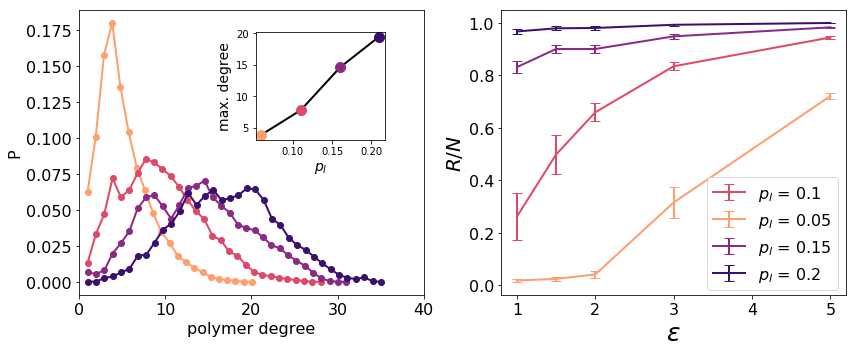

In [12]:
get_degree_and_domain_plot_pl(df,df_param,"plink","degree_domain_pl","$p_{l}$", "polymer","magma_r")

In [13]:
def get_degree_crosslinker_plot(df,df_param,name,colormap):
    

    df_d = pd.DataFrame({"degree_sequence": df.groupby('id').degree_sequence.apply(list)}).reset_index()
    df_d.degree_sequence = df_d.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df_d = pd.merge(df_d,df_param, on='id')
    
    
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
     
   
    # degree epsilon 
    max_total=15   
    x="epsilon"
    label="$\\epsilon$"
    brr = np.empty(len(df_d[x].unique()))  
    
    std_cond = {'epsilon':5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    df_s = df_d
    for key, val in std_cond.items():
         if key!=x:
                df_s = df_s[df_s[key] == val]
    
    
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))    
    for lx, x_i in enumerate(sorted(df_s[x].unique())):
        
        
        di = df_d[(df_d[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax1.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax1.set_xlabel("crosslinker degree", fontsize=16)
        ax1.set_ylabel("P", fontsize=16)
        ax1.set_xlim((0,max_total))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        ax1.legend(ncol=1, loc='best', fontsize=10)
        plt.tight_layout()
    
    
    axins1 = fig.add_axes([0.2, 0.4, 0.11, 0.22])
    xl = np.array(sorted(df_d[x].unique())) 
    axins1.plot(xl+0.01, brr, color='k', lw=2)
    for i,x_i in enumerate(sorted(df_d[x].unique())):
        axins1.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
    
                   
    axins1.set_ylabel("max. degree", size=14)
    axins1.set_xlabel(label, size=14)

    
    # degree pl 
    max_total=15   
    x="plink"
    brr = np.empty(len(df_d[x].unique()))  
    label="$p_{l}$"
    
    std_cond = {'epsilon':5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    df_s = df_d
    for key, val in std_cond.items():
         if key!=x:
                df_s = df_s[df_s[key] == val]
    
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))        
    for lx, x_i in enumerate(sorted(df_s[x].unique())):
        di = df_d[(df_d[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax2.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax2.set_xlabel("crosslinker degree", fontsize=16)
        ax2.set_ylabel("P", fontsize=16)
        ax2.set_xlim((0,max_total))
        ax2.tick_params(axis='both', which='major', labelsize=16)
        ax2.legend(ncol=1, loc='best', fontsize=10)
        plt.tight_layout()
    
    axins2 = fig.add_axes([0.55, 0.3, 0.11, 0.22])
    xl = np.array(sorted(df_d[x].unique())) 
    axins2.plot(xl+0.01, brr, color='k', lw=2)
    
    for i,x_i in enumerate(sorted(df_d[x].unique())):
        axins2.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
                   
    axins2.set_ylabel("max. degree", size=14)
    axins2.set_xlabel(label, size=14)

    # degree kb
    max_total=15 
    x="kb"
    brr = np.empty(len(df_d[x].unique()))  
    label="$k_{b}$"
    
    std_cond = {'epsilon':5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    df_s = df_d
    for key, val in std_cond.items():
         if key!=x:
                df_s = df_s[df_s[key] == val]
    
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))       
    for lx, x_i in enumerate(sorted(df_s[x].unique())):
        di = df_d[(df_d[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        print("kb hist")
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax3.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax3.set_xlabel("crosslinker degree", fontsize=16)
        ax3.set_ylabel("P", fontsize=16)
        ax3.set_xlim((0,max_total))
        ax3.tick_params(axis='both', which='major', labelsize=16)
        plt.tight_layout()
      
    axins3 = fig.add_axes([0.3, 0.6, 0.15, 0.3])
    xl = np.array(sorted(df_d[x].unique())) 
    axins3.plot(xl+0.01, brr, color='k', lw=2)
    for i,x_i in enumerate(sorted(df_d[x].unique())):
        axins3.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
    
    axins3.set_ylabel("max. degree", size=14)
    axins3.set_xlabel(label, size=14)
    
    ax3.legend(ncol=1, loc='best', fontsize=10)
    plt.savefig("{}_pl_kb_epsi_plot.pdf".format(name))



    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipyker

kb hist
kb hist


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:120: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:120: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includ

kb hist
kb hist


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:120: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:120: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


kb hist


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


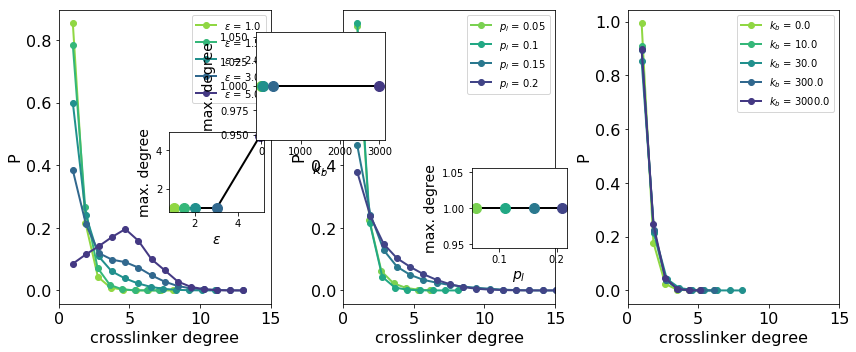

In [14]:
get_degree_crosslinker_plot(dc,dc_param,"degree_crosslinker_kb_pl_epsilon","viridis_r")



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplo

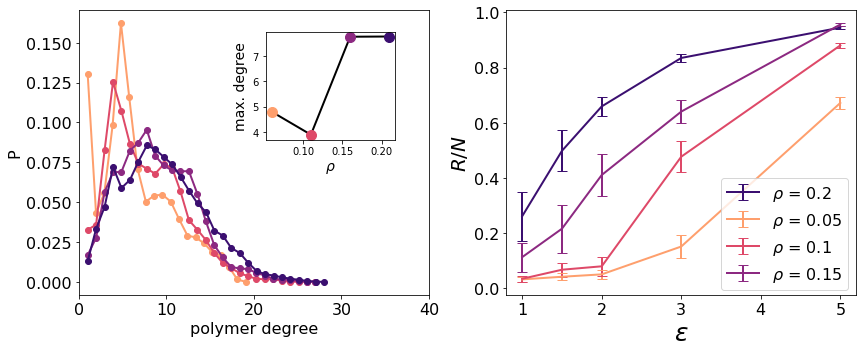

In [15]:
get_degree_and_domain_plot_pl(df,df_param,"rho","degree_domain_rho","$\\rho$", "polymer","magma_r")